In [1]:
# Implementing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras

In [2]:
# Checking Versions
print(f"Tensorflow Version {tf.__version__}")
#print(f"Keras Version {tf.keras__version__}")

Tensorflow Version 2.15.0


In [3]:
os.getcwd()

'/content'

GPU and CPU check

In [4]:
tf.config.list_physical_devices("GPU") # It will return an empty list because google colab didn't assign GPU. I have to enable manually.

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
#
check_list = ['CPU','GPU']

for device in check_list :
  out = tf.config.list_physical_devices(device)
  if len(out) > 0 :
    print(f"{device} is available")
    print(f"Details >> {out}")
  else :
    print(f"{device} is not available!")

CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is not available!


In [7]:
# for this task we need GPU and google colab can lend GPU

# for enabling GPU, go to runtime > change runtime type > select GPU in hardware accelerator > save

# restart runtime

In [8]:
tf.config.list_physical_devices("GPU")

[]

In [9]:
check_list = ['CPU','GPU']

for device in check_list :
  out = tf.config.list_physical_devices(device)
  if len(out) > 0 :
    print(f"{device} is available")
    print(f"Details >> {out}")
  else :
    print(f"{device} is not available!")

CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is not available!


#Implementing Deep Learning Model

### Creating a simple classifier using keras on MNIST data

In [10]:
# there are already a dataset present in the tensorflow.keras names MNIST data

mnist = tf.keras.datasets.mnist

In [11]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
X_test.shape # there are 10,000 images with images of 28x28 matrics

(10000, 28, 28)

In [14]:
X_train_full.shape # there are 60,000 images with images of 28x28 matrics

(60000, 28, 28)

mnist data are the dataset consists of different handwriting digits. you can find it on google.

In [15]:
# to see one image can show binary data
X_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [16]:
# shape of the data
X_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [17]:
# printing the values

print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full : {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full : (60000, 28, 28)


In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
# creating a validation data set from the full training data

# Scale the data between 0 to 1 by dividing it by 255 as its unsigned data between 0-255 range

X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# Scaling the test set

X_test = X_test / 255

In [20]:
# TRAIN - 55000
# TEST - 10000
# VAL - 5000

In [21]:
len(X_train_full[5000:])

55000

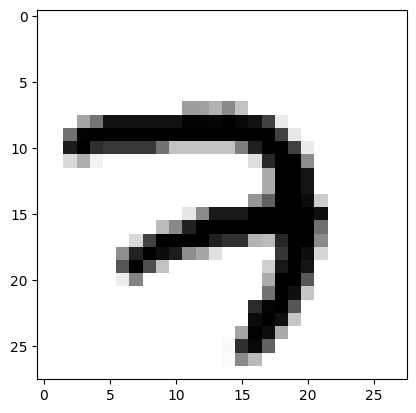

In [22]:
# let show some data

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

<Axes: >

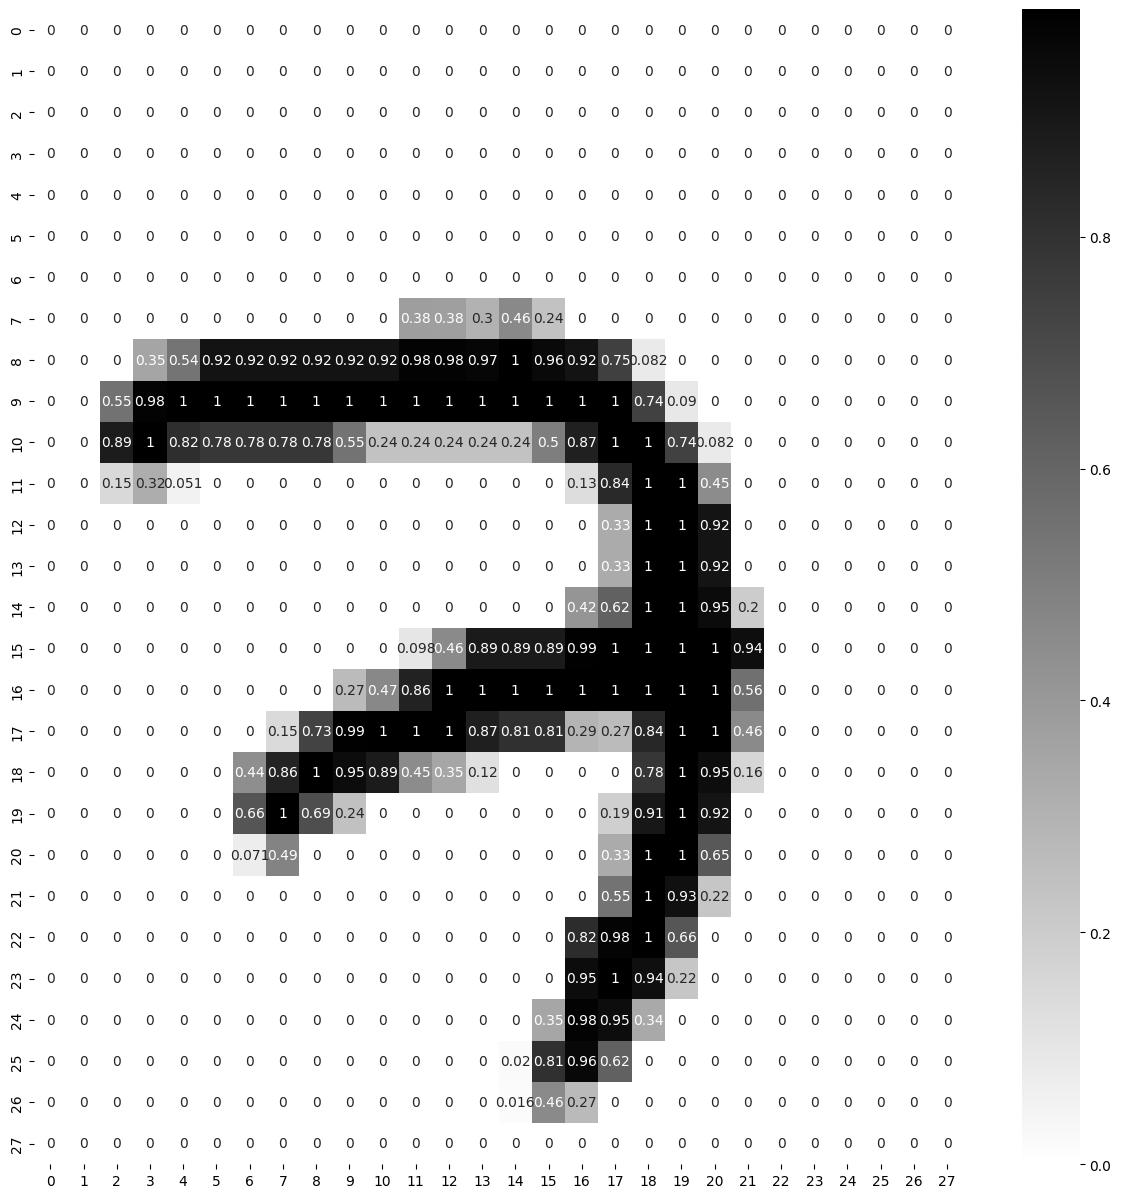

In [23]:
# for understanding for the machine

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

In [24]:
# creating Layers of ANN

LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300, activation = 'relu', name = 'hiddenLayer1'),
          tf.keras.layers.Dense(100, activation = 'relu', name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10, activation = 'softmax', name = 'outputLayer')]

model_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
# METHOD 2

from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model

model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = 100))
model.add(Dense(units = 10, activation = 'softmax'))



In [26]:
model_clf.layers

# here 3 layers and the last layer showing the output

In [27]:
# showing model summary

model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# First_layers * Second_layers + Bias

784*300 +300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [29]:
# total parameters

sum((235500, 30100, 1010))

266610

In [30]:
input = model_clf.layers[0]

input.name

'inputLayer'

In [31]:
input = model_clf.layers[1]

input.name

'hiddenLayer1'

In [32]:
input = model_clf.layers[2]

input.name

'hiddenLayer2'

In [33]:
input = model_clf.layers[3]

input.name

'outputLayer'

In [34]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy' # use -> tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate -> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


In [35]:
model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [36]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6079 - accuracy: 0.8433 - val_loss: 0.3062 - val_accuracy: 0.9150
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2905 - accuracy: 0.9173 - val_loss: 0.2510 - val_accuracy: 0.9280
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2389 - accuracy: 0.9311 - val_loss: 0.2066 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2050 - accuracy: 0.9417 - val_loss: 0.1812 - val_accuracy: 0.9490
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1796 - accuracy: 0.9487 - val_loss: 0.1642 - val_accuracy: 0.9538
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9550 - val_loss: 0.1475 - val_accuracy: 0.9596
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9589 - val_loss: 0.1336 - val_accuracy:

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607888,0.843345,0.306163,0.9150
1,0.290490,0.917327,0.250954,0.9280
2,0.238853,0.931109,0.206593,0.9412
3,0.205006,0.941673,0.181155,0.9490
4,0.179622,0.948709,0.164194,0.9538
5,0.159431,0.955036,0.147472,0.9596
6,0.143162,0.958873,0.133623,0.9634
7,0.130132,0.963036,0.124099,0.9652
8,0.118319,0.966655,0.116721,0.9694
9,0.108329,0.969273,0.109954,0.9700


<Axes: >

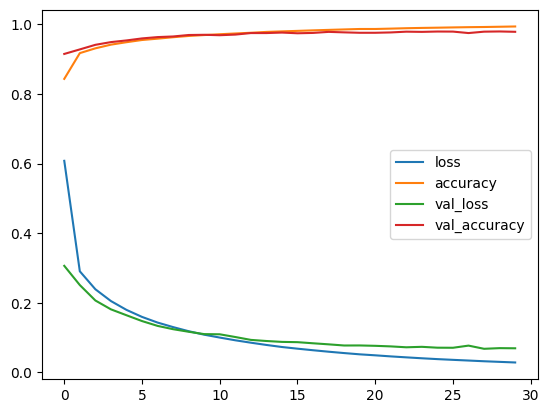

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9803


[0.07092081755399704, 0.9803000092506409]

# Sample Check-Test data

In [41]:
x_new = X_test[:3]

In [42]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

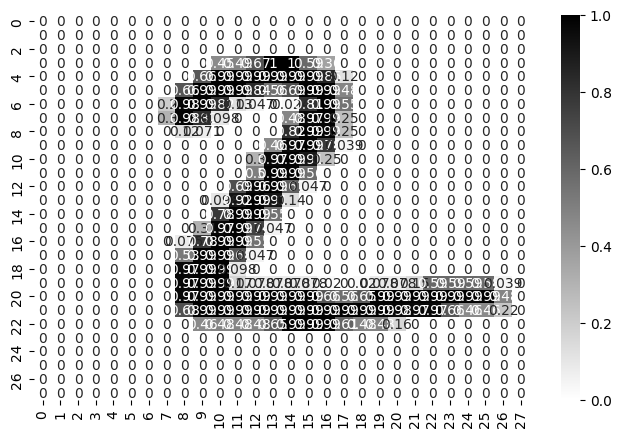

In [43]:
plt.figure(figsize = (8,5))
sns.heatmap(X_test[1], annot=True, cmap = 'binary')

In [44]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 61ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.992, 0.002, 0.   , 0.001, 0.   , 0.   , 0.003, 0.002,
        0.   ]], dtype=float32)

In [45]:
y_prob

array([[8.37711127e-07, 6.13832185e-08, 1.28592201e-05, 3.49422044e-04,
        3.06957348e-09, 3.73201175e-07, 9.17005447e-12, 9.99625564e-01,
        5.87205250e-07, 1.02872091e-05],
       [1.39123543e-07, 4.14947317e-06, 9.99969721e-01, 1.72866512e-05,
        3.56948303e-12, 2.14245802e-07, 1.13161184e-06, 1.28818809e-12,
        7.34602054e-06, 3.49258491e-13],
       [1.51575305e-05, 9.92463470e-01, 1.59068790e-03, 1.16711475e-04,
        6.57055178e-04, 5.08676967e-05, 2.11560400e-04, 2.57021515e-03,
        2.29937234e-03, 2.48311117e-05]], dtype=float32)

In [46]:
y_pred = np.argmax(y_prob, axis = -1)

In [47]:
y_pred

array([7, 2, 1])

In [48]:
actual

array([7, 2, 1], dtype=uint8)

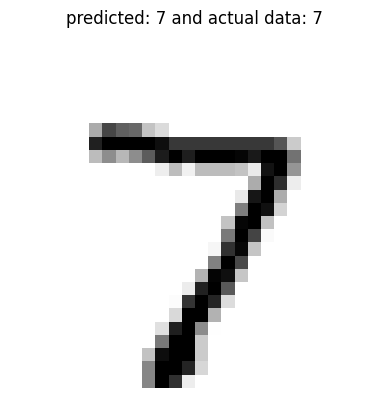

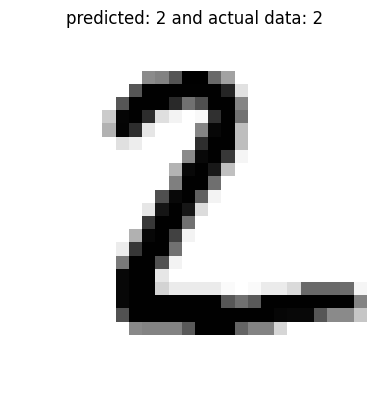

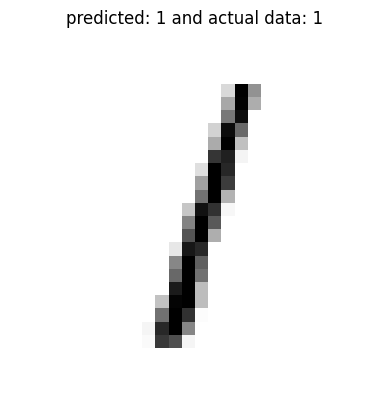

In [49]:
# plot

for data, pred, actual_data in zip(x_new, y_pred, actual) :
  plt.imshow(data, cmap='binary')
  plt.title(f"predicted: {pred} and actual data: {actual_data}")
  plt.axis('off')
  plt.show()